In [52]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os 

In [79]:
e2e_result_dir="e2e_result/"

# infer_result_name="vllm-100.0qps-Llama-2-13b-chat-hf-20240619-073917-infer-tr15.json"
# fcfs_result_name="vllm-100.0qps-Llama-2-13b-chat-hf-20240619-074516-fcfs-tr15.json"

In [84]:

def merge_result(policy, qps, model_name ,tr_value, result):
    for root, dirs, files in os.walk(e2e_result_dir):
        for file in files:
            if tr_value in file and model_name in file and policy in file and qps in file:
                print(file)
                tmp = json.load(open(os.path.join(root, file)))  # noqa: SIM115
                for k, v in tmp.items():
                    if k not in result:
                        result[k] = v
                    else:
                        if isinstance(v, list):
                            result[k].extend(v)
                        elif isinstance(v, int):
                            result[k] = (result[k] + v)/2
                        else:
                            continue
    
qps="100"
model_name="Llama-2-13b-chat-hf"
policy = ["fcfs", "infer"]
tr=["tr15"]
fcfs_result = {}
infer_result = {}
for tr_value in tr:
    for p in policy:
        if p == "fcfs":
            merge_result(p, qps, model_name, tr_value, fcfs_result)
        elif p == "infer":
            merge_result(p, qps, model_name, tr_value, infer_result)
                        

vllm-100.0qps-Llama-2-13b-chat-hf-20240619-071409-fcfs-tr15.json
vllm-100.0qps-Llama-2-13b-chat-hf-20240619-074516-fcfs-tr15.json
vllm-100.0qps-Llama-2-13b-chat-hf-20240619-070802-infer-tr15.json
vllm-100.0qps-Llama-2-13b-chat-hf-20240619-073917-infer-tr15.json


In [85]:
# fcfs_result["date"]
infer_result["date"]

'20240619-070802'

In [87]:
fcfs_latencies=fcfs_result["latencies"]
infer_latencies=infer_result["latencies"]
df = pd.DataFrame({"fcfs": fcfs_latencies, "infer": infer_latencies})
df_result=df.describe(percentiles=[0.5,0.95])

In [88]:
df_result

,fcfs,infer
count,500.000000,500.000000
mean,118.126212,107.343882
std,74.752981,65.443799
min,0.840515,0.320709
50%,125.556115,115.774802
95%,237.091409,211.445680
max,246.024755,222.049111


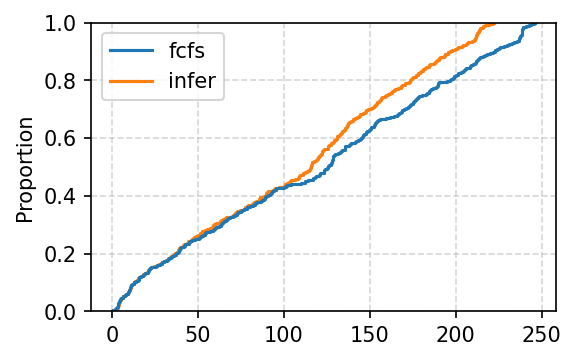

In [89]:
plt.figure(figsize=(4,2.5), dpi=150)
sns.ecdfplot(data=df)
plt.grid(alpha=0.5, linestyle="--")